<a href="https://colab.research.google.com/github/cacalos121-collab/Proyectos-/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción de tipos de lluvias en la ciudad de Medellín*
Por Natalia Marin  
Susana Otalvaro
Carlos Daniel Mosquera





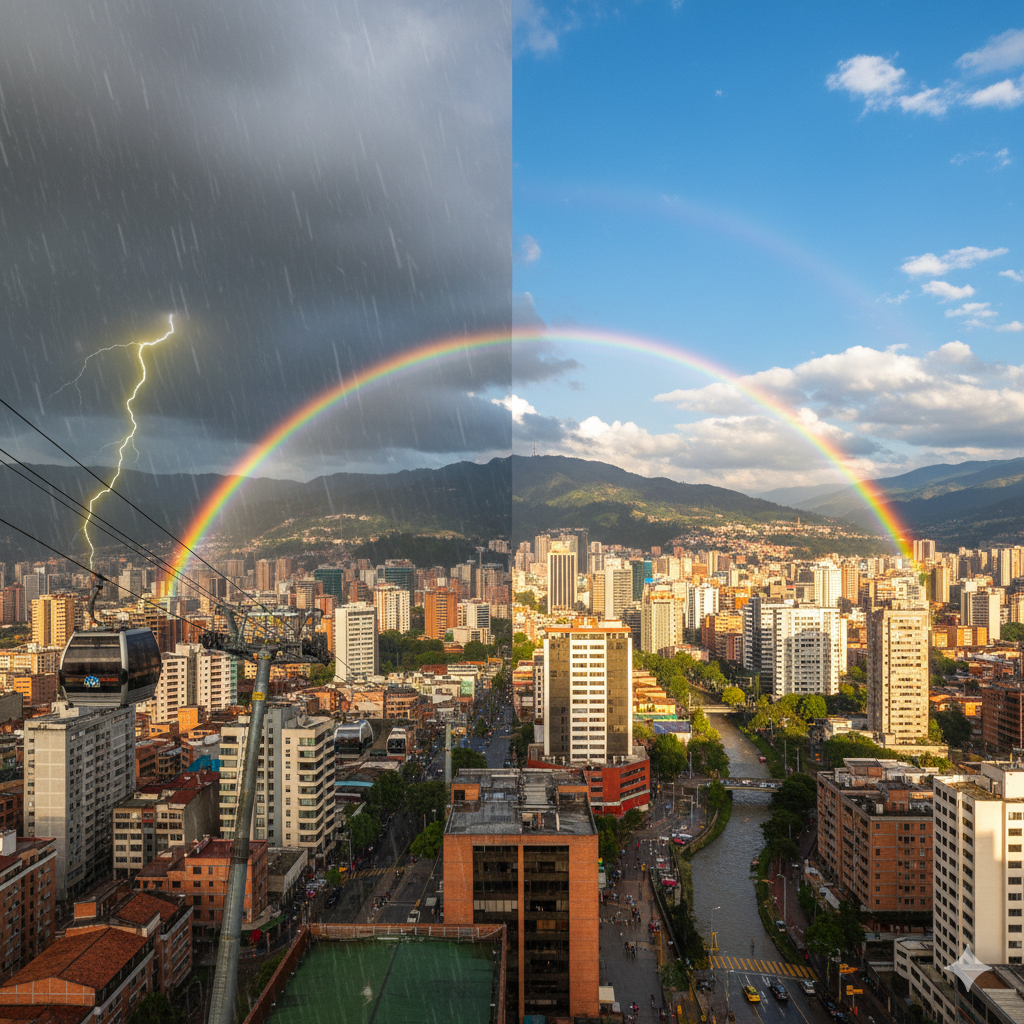

In [ ]:
#Carga de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Importar, leer y hacer una copia del dataset original
Clima_Medellin = pd.read_csv("/content/historical-weather-medellin.csv")

In [ ]:
Clima_Medellin

,Date (yyyy-mm-dd),Max_temperature (°C),Min_temperature (°C),Rain (mm),Wind (km/h),Description,City
0,2024-01-01,25,10,1.3,5,Lluvia moderada a intervalos,Medellín
1,2023-01-01,18,8,3.0,3,Ligeras precipitaciones,Medellín
2,2022-01-01,18,10,4.0,2,Ligeras precipitaciones,Medellín
3,2021-01-01,21,11,12.5,4,Lluvias fuertes o moderadas,Medellín
4,2020-01-01,18,11,27.8,3,Lluvias fuertes o moderadas,Medellín
...,...,...,...,...,...,...,...
2153,2023-12-31,23,8,3.6,5,Niebla moderada,Medellín
2154,2022-12-31,18,9,2.5,4,Ligeras precipitaciones,Medellín
2155,2021-12-31,19,9,2.4,3,Ligeras precipitaciones,Medellín
2156,2020-12-31,19,10,19.9,3,Lluvias fuertes o moderadas,Medellín


**Análisis de datos**

In [ ]:
#Conocer en detalle la estructura del dataset
Clima_Medellin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date (yyyy-mm-dd)     2158 non-null   object 
 1   Max_temperature (°C)  2158 non-null   int64  
 2   Min_temperature (°C)  2158 non-null   int64  
 3   Rain (mm)             2158 non-null   float64
 4   Wind (km/h)           2158 non-null   int64  
 5   Description           2158 non-null   object 
 6   City                  2158 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 118.1+ KB


In [ ]:
#Separación de la columna "Date" y renombramiento a "Año", "Mes" y "Día"
nuevas_columnas = Clima_Medellin['Date (yyyy-mm-dd)'].str.split('-', expand=True)

Clima_Medellin['Año'] = nuevas_columnas[0]
Clima_Medellin['Mes'] = nuevas_columnas[1]
Clima_Medellin["Dia"] = nuevas_columnas[2]

#Eliminar la columna original si es necesario
Clima_Medellin.drop('Date (yyyy-mm-dd)', axis=1, inplace=True)

In [ ]:
#elimar la columna "city"
Clima_Medellin = Clima_Medellin.drop(columns=["City"])

In [ ]:
Clima_Medellin

,Max_temperature (°C),Min_temperature (°C),Rain (mm),Wind (km/h),Description,Año,Mes,Dia
0,25,10,1.3,5,Lluvia moderada a intervalos,2024,01,01
1,18,8,3.0,3,Ligeras precipitaciones,2023,01,01
2,18,10,4.0,2,Ligeras precipitaciones,2022,01,01
3,21,11,12.5,4,Lluvias fuertes o moderadas,2021,01,01
4,18,11,27.8,3,Lluvias fuertes o moderadas,2020,01,01
...,...,...,...,...,...,...,...,...
2153,23,8,3.6,5,Niebla moderada,2023,12,31
2154,18,9,2.5,4,Ligeras precipitaciones,2022,12,31
2155,19,9,2.4,3,Ligeras precipitaciones,2021,12,31
2156,19,10,19.9,3,Lluvias fuertes o moderadas,2020,12,31


**Definición del modelo**

In [ ]:
X = Clima_Medellin

In [ ]:
y = Clima_Medellin["Mes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Max_temperature (°C),Min_temperature (°C),Rain (mm),Wind (km/h),Description,Año,Mes,Dia
1113,25,11,12.9,6,Ligeras precipitaciones,2024,05,06
798,24,11,12.6,5,Intervalos de lluvias ligeras con tomenta en l...,2021,05,24
478,17,12,27.5,2,Lluvias fuertes o moderadas,2019,03,21
973,22,8,4.4,5,Llovizna a intervalos,2024,07,13
471,21,13,37.5,4,Lluvias torrenciales,2020,03,20
...,...,...,...,...,...,...,...,...
1638,21,15,7.7,4,Ligeras precipitaciones,2022,10,08
1095,22,11,18.4,2,Ligeras precipitaciones,2024,05,03
1130,17,13,27.3,3,Periodos de fuertes lluvias,2019,05,08
1294,24,10,22.6,6,Intervalos de lluvias ligeras con tomenta en l...,2023,08,07


In [ ]:
y_train

,Mes
1113,05
798,05
478,03
973,07
471,03
...,...
1638,10
1095,05
1130,05
1294,08


In [ ]:
Clima_Medellin["Mes"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [ ]:
Clima_Medellin['Description'] = Clima_Medellin['Description'].replace({"Lluvia moderada a intervalos": 1, 'Ligeras precipitaciones':2,
       'Lluvias fuertes o moderadas':3, 'Despejado':4, 'Parcialmente nublado':5,
       'Niebla moderada':6, 'Llovizna a intervalos':7, 'Neblina':8, 'Llovizna':9,
       'Intervalos de lluvias ligeras con tomenta en la región':10,
       'Lluvias torrenciales':11, 'Periodos de lluvia moderada':12,
       'Lluvia moderada':13, 'Fuertes lluvias':14, 'Ligeras lluvias':15,
       'Lluvias ligeras a intervalos':16, 'Periodos de fuertes lluvias':17})

/tmp/ipython-input-2127507635.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Clima_Medellin['Description'] = Clima_Medellin['Description'].replace({"Lluvia moderada a intervalos": 1, 'Ligeras precipitaciones':2,


In [ ]:
Clima_Medellin["Description"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
Clima_Medellin2 = Clima_Medellin[[col for col in Clima_Medellin.columns if col not in ["Description"]]]

In [ ]:
X = Clima_Medellin2
y = Clima_Medellin["Description"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
X_test

,Max_temperature (°C),Min_temperature (°C),Rain (mm),Wind (km/h),Año,Mes,Dia
997,23,9,37.2,5,2023,07,17
361,19,10,3.6,3,2022,03,02
416,17,11,26.5,3,2021,03,11
1112,21,12,10.1,6,2019,05,05
485,23,11,7.0,3,2024,03,23
...,...,...,...,...,...,...,...
20,20,7,0.0,5,2022,01,04
1405,27,13,9.6,6,2019,08,28
1717,23,8,2.7,3,2021,10,21
381,27,12,2.7,5,2020,03,05


In [ ]:
y_test

,Description
997,3
361,2
416,3
1112,16
485,2
...,...
20,8
1405,2
1717,2
381,10


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([5.89145137, 2.87819637, 4.33101009, 4.89474783, 2.82515644,
       3.3684075 , 4.55398382, 4.40990733, 3.81876587, 5.54051321,
       5.07330851, 4.72450886, 3.1204206 , 3.77244841, 5.24514714,
       3.29582683, 4.13776302, 4.66183826, 6.84047414, 3.3472232 ,
       4.0743654 , 4.28306711, 3.28289913, 4.36558361, 2.55760581,
       4.08863819, 4.46365477, 6.48172322, 4.36465525, 5.20181768,
       4.45698975, 5.07423682, 3.84435821, 4.12643976, 5.331786  ,
       3.72493342, 6.56949126, 3.80510047, 3.93850132, 5.12305295,
       2.95407661, 3.01467285, 3.42773584, 5.22919049, 3.88115808,
       3.34657236, 4.92825592, 6.22511997, 5.5922068 , 4.40362192,
       4.37136731, 5.98803633, 3.48962073, 3.52768884, 3.90056283,
       4.05560249, 4.25764405, 3.86915107, 3.07457885, 3.28141848,
       4.93041439, 3.56258292, 3.31766822, 3.74873613, 4.40672137,
       5.16598021, 3.04956008, 4.36501233, 5.02277128, 4.88666753,
       4.01485147, 4.05380861, 3.71669415, 5.62083281, 4.96190

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error (MSE): 11.90
Mean Absolute Error (MAE): 2.84
R² Score: 0.08


In [ ]:
y_pred = model.predict([[20,9.9,3.4,13.5,2025,10,30]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred

array([5.6982358])

ValueError: x and y must be the same size

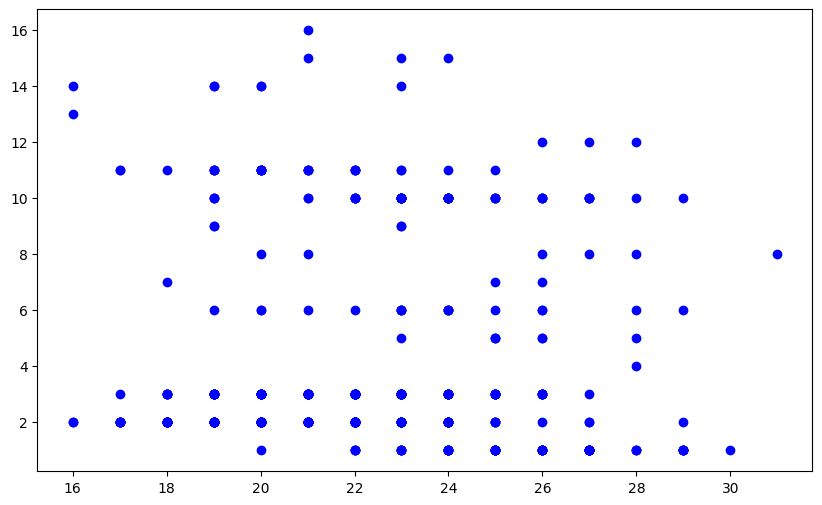

In [ ]:
# Gráfico de regresión para una sola característica (Max_temperature)
plt.figure(figsize=(10, 6))
# sns.regplot(x=X_test['Max_temperature (°C)'], y=y_test, marker='o', label='Datos Reales', color='blue')
plt.scatter(X_test['Max_temperature (°C)'], y_test.values, marker='o', label='Datos Reales', color='blue')
plt.scatter(X_test['Max_temperature (°C)'], y_pred, color='red', label='Predicciones', alpha=0.5)
plt.title('Predicciones de Descripción de Lluvia vs Temperatura Máxima')
plt.xlabel('Max_temperature (°C)')
plt.ylabel('Description')
plt.legend()
plt.show()

ValueError: x and y must be the same size

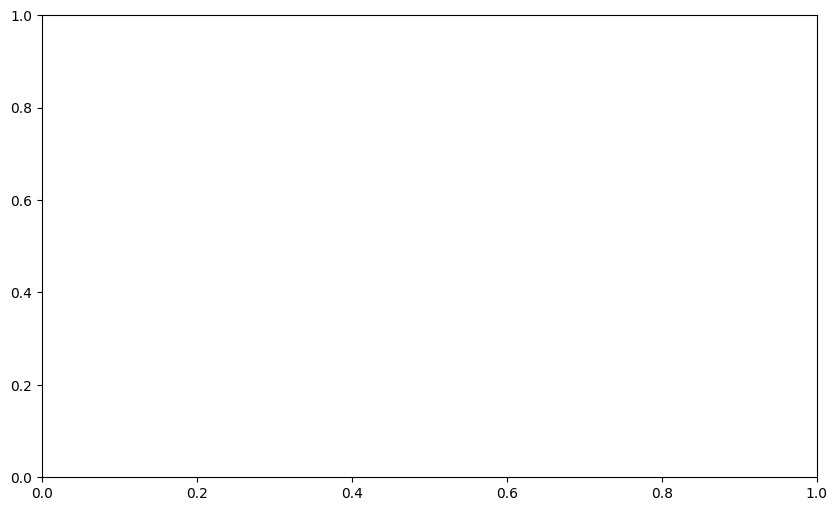

In [ ]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea Perfecta')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

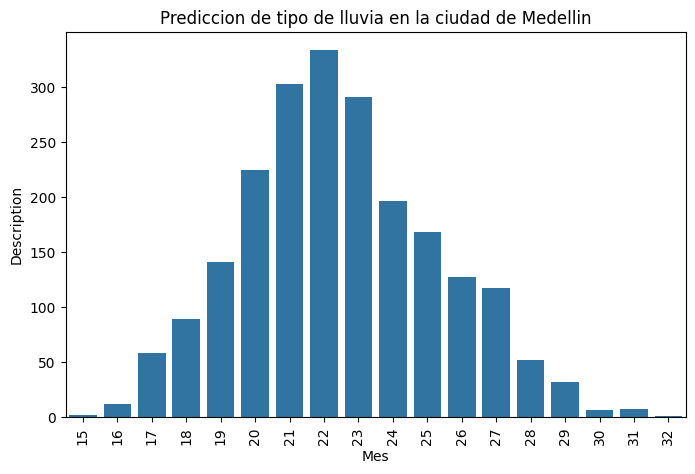

In [ ]:

# Gráfico de barras de la cantidad la temperatura
plt.figure(figsize=(8, 5))
sns.countplot(x='Max_temperature (°C)', data=Clima_Medellin)
plt.title('Prediccion de tipo de lluvia en la ciudad de Medellin')
plt.xlabel('Mes')
plt.ylabel('Description')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Clima_Medellin["Mes"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [ ]:
Clima_Medellin["Rain (mm)"].unique()

array([1.300e+00, 3.000e+00, 4.000e+00, 1.250e+01, 2.780e+01, 0.000e+00,
       5.000e+00, 5.400e+00, 4.500e+00, 1.330e+01, 1.400e+01, 2.700e+00,
       7.200e+00, 1.700e+00, 1.660e+01, 4.100e+00, 1.200e+00, 3.700e+00,
       4.400e+00, 6.000e+00, 9.000e-01, 3.400e+00, 4.000e-01, 9.500e+00,
       4.300e+00, 1.500e+00, 1.000e-01, 5.900e+00, 1.800e+00, 1.570e+01,
       3.000e-01, 3.600e+00, 6.600e+00, 7.700e+00, 1.100e+00, 4.200e+00,
       6.000e-01, 7.300e+00, 1.030e+01, 5.000e-01, 9.400e+00, 3.300e+00,
       4.660e+01, 8.700e+00, 4.600e+00, 2.500e+00, 3.480e+01, 8.100e+00,
       1.600e+00, 2.520e+01, 2.200e+00, 2.000e+00, 1.320e+01, 3.500e+00,
       5.300e+00, 2.900e+00, 7.900e+00, 1.310e+01, 8.000e-01, 1.220e+01,
       1.370e+01, 7.000e-01, 7.400e+00, 9.100e+00, 1.910e+01, 2.000e-01,
       3.800e+00, 2.500e+01, 1.000e+00, 8.500e+00, 1.170e+01, 1.400e+00,
       2.400e+00, 1.950e+01, 9.600e+00, 1.720e+01, 8.400e+00, 1.900e+00,
       1.510e+01, 1.150e+01, 9.900e+00, 3.670e+01, 

In [ ]:
Clima_Medellin["Min_temperature (°C)"].unique()

array([10,  8, 11, 12,  7, 13,  9, 14, 15, 16,  5, 17,  6])

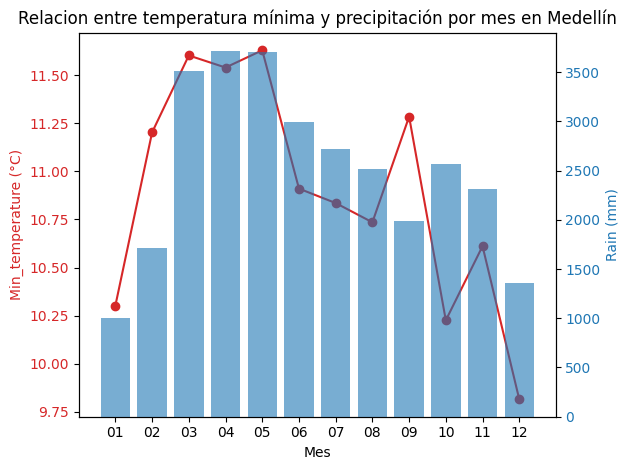

In [ ]:
# Calculate monthly mean minimum temperature and total rain
temperatura_media = Clima_Medellin.groupby('Mes')['Min_temperature (°C)'].mean()
precipitaciones_mensuales = Clima_Medellin.groupby('Mes')['Rain (mm)'].sum()

# Create the plot
fig, ax1 = plt.subplots()

# Eje para la temperatura (línea)
ax1.set_xlabel('Mes')
ax1.set_ylabel('Min_temperature (°C)', color='tab:red')
ax1.plot(temperatura_media.index, temperatura_media, marker='o', color='tab:red', label='Min_temperature (°C)')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Eje secundario para las precipitaciones (barras)
ax2 = ax1.twinx()
ax2.set_ylabel('Rain (mm)', color='tab:blue')
ax2.bar(precipitaciones_mensuales.index, precipitaciones_mensuales, color='tab:blue', alpha=0.6, label='Rain (mm)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add title
plt.title('Relacion entre temperatura mínima y precipitación por mes en Medellín')
fig.tight_layout()
plt.show()